# KIVA Feature engineering

## Foundations

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import precision_score, make_scorer, accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
read_failure = pd.read_csv("Failures_JAN_FEB.csv", low_memory=False)
read_success = pd.read_csv("Data_till_NOV.csv", low_memory=False)
pd.set_option('display.max_columns', None)

In [ ]:
read_success.shape

(10973, 120)

In [ ]:
read_failure.shape

(36935, 118)

In [ ]:
import numpy as np
np.arange(5,36,3)

array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35])

In [ ]:
def convert_data_to_user_granularity(data_frame):
    new_data_frame = pd.DataFrame(columns = ['DOMAIN_USERID', 'SUM_SESSION_LENGTH', 'NUMBER_OF_SESSIONS', 'sum_of_unique_pages',  'sum_num_about_page_views', 'sum_num_direct_page_views', 'sum_num_lend_page_views', 'sum_num_get_started_page_views', 'sum_num_borrower_profiles', 'sum_num_core_borrower', 'sum_num_donate_page', 'sum_num_basket_page', 'sum_basket_payment', 'sum_num_basket_validate_events', 'sum_MG_page', 'sum_num_mg_setup', 'sum_num_portfolio_pageviews', 'sum_num_events', 'sum_num_add_to_basket_events', 'sum_num_click_actions', 'Transaction_output', 'HAS_REGISTRATION_agg', 'HAS_LOGIN_agg', 'HAS_REGISTERED_BEFORE_agg', 'IS_PART_OF_EXP', 'FIRST_REFR_MEDIUMsearch', 'FIRST_REFR_MEDIUMinternal', 'FIRST_REFR_MEDIUMunknown', 'FIRST_REFR_MEDIUMnan', 'FIRST_REFR_MEDIUMsocial', 'FIRST_MKT_MEDIUMnan', 'FIRST_MKT_MEDIUMemail', 'FIRST_MKT_MEDIUMpaidsocial','Location'])
    for index, user_id in enumerate(pd.unique(data_frame["DOMAIN_USERID"])):
        dict_user ={}

        dict_user["DOMAIN_USERID"] = user_id
        this_user_data = data_frame[data_frame["DOMAIN_USERID"]==user_id]
        dict_user["SUM_SESSION_LENGTH"] = sum(this_user_data["SESSION_LENGTH_MINUTES"]) - list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["SESSION_LENGTH_MINUTES"])[0]
        dict_user["NUMBER_OF_SESSIONS"] = max(this_user_data["DOMAIN_USER_SESSION_NUMBER"])
        dict_user["sum_of_unique_pages"] = sum(this_user_data["NUM_UNIQUE_PAGE_VIEWS"])- list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_UNIQUE_PAGE_VIEWS"])[0]
        dict_user["sum_num_about_page_views"] =      sum(this_user_data["NUM_ABOUT_PAGE_VIEWS"]) - list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_ABOUT_PAGE_VIEWS"])[0]
        dict_user["sum_num_direct_page_views"] =      sum(this_user_data["NUM_DIRECT_BORROW_PAGE_VIEWS"]) - list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_DIRECT_BORROW_PAGE_VIEWS"])[0]
        dict_user["sum_num_lend_page_views"] =      sum(this_user_data["NUM_LEND_EXPERIENCE_VIEWS"]) - list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_LEND_EXPERIENCE_VIEWS"])[0]
        dict_user["sum_num_get_started_page_views"] =      sum(this_user_data["NUM_GET_STARTED_PAGEVIEWS"]) - list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_GET_STARTED_PAGEVIEWS"])[0]
        dict_user["sum_num_borrower_profiles"] =      sum(this_user_data["NUM_BORROWER_PROFILES_VIEWED"]) - list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_BORROWER_PROFILES_VIEWED"])[0]
        dict_user["sum_num_core_borrower"] =      sum(this_user_data["NUM_CORE_BORROWER_PROFILES_VIEWED"]) - list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_CORE_BORROWER_PROFILES_VIEWED"])[0]
        dict_user["sum_num_borrower_profiles"] =      sum(this_user_data["NUM_DIRECT_BORROWER_PROFILES_VIEWED"]) -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_DIRECT_BORROWER_PROFILES_VIEWED"])[0]
        dict_user["sum_num_donate_page"] =      sum(this_user_data["NUM_DONATE_PAGEVIEWS"]) -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_DONATE_PAGEVIEWS"])[0]
        dict_user["sum_num_basket_page"] =      sum(this_user_data["NUM_BASKET_PAGEVIEWS"]) -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_BASKET_PAGEVIEWS"])[0]
        dict_user["sum_basket_payment"] =      sum(this_user_data["NUM_BASKET_PAYMENT_PAGEVIEWS"])  -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_BASKET_PAYMENT_PAGEVIEWS"])[0]
        dict_user["sum_num_basket_validate_events"] =     sum(this_user_data["NUM_VALIDATE_BASKET_EVENTS"])  -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_VALIDATE_BASKET_EVENTS"])[0]
        dict_user["sum_MG_page"]   =    sum(this_user_data["NUM_MONTHLYGOOD_PAGEVIEWS"]) -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_MONTHLYGOOD_PAGEVIEWS"])[0]
        dict_user["sum_num_mg_setup"] =      sum(this_user_data["NUM_MONTHLYGOOD_SETUP_PAGEVIEWS"]) -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_MONTHLYGOOD_SETUP_PAGEVIEWS"])[0]
        dict_user["sum_num_portfolio_pageviews"] =      sum(this_user_data["NUM_PORTFOLIO_PAGEVIEWS"]) -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_PORTFOLIO_PAGEVIEWS"])[0]
        dict_user["sum_num_events"] =      sum(this_user_data["NUM_EVENTS"]) -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_EVENTS"])[0]
        dict_user["sum_num_add_to_basket_events"] =      sum(this_user_data["NUM_ADD_TO_BASKET_EVENTS"]) -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_ADD_TO_BASKET_EVENTS"])[0]
        dict_user["sum_num_click_actions"] =      sum(this_user_data["NUM_CLICK_ACTIONS"]) -  list(this_user_data[this_user_data["HAS_TRANSACTION_EVENT"]=="yes"]["NUM_CLICK_ACTIONS"])[0]
        dict_user['Transaction_output'] = 1 if any(this_user_data["HAS_TRANSACTION_EVENT"] == "yes") else 0
        dict_user['HAS_REGISTRATION_agg'] = sum(this_user_data['HAS_REGISTRATION'])
        dict_user['HAS_LOGIN_agg'] = sum(this_user_data['HAS_LOGIN'])
        dict_user['HAS_REGISTERED_BEFORE_agg'] = sum(this_user_data['HAS_REGISTERED_BEFORE'])
        dict_user['IS_PART_OF_EXP'] = dict_user["NUMBER_OF_SESSIONS"] - sum((this_user_data['EXPERIMENT_CATEGORIES'].isnull()))
        for i in pd.unique(read_success['FIRST_REFR_MEDIUM']):
            dict_user[('FIRST_REFR_MEDIUM'+str(i))] = sum(this_user_data['FIRST_REFR_MEDIUM']==i)

        for i in pd.unique(read_success['FIRST_MKT_MEDIUM']):
            dict_user[('FIRST_MKT_MEDIUM'+str(i))] = sum(this_user_data['FIRST_MKT_MEDIUM']==i)

        for i in pd.unique(read_success['PAGE_VIEW_SEGMENT']):
            dict_user[('PAGE_VIEW_SEGMENT'+str(i))] = sum(this_user_data['PAGE_VIEW_SEGMENT']==i)

      #  for i in pd.unique(read_success['BROWSER_FAMILY']):
       #     dict_user[('BROWSER_FAMILY'+str(i))] = sum(this_user_data['BROWSER_FAMILY']==i)

        #for i in pd.unique(read_success['DEVICE_TYPE']):
         #   dict_user[('DEVICE_TYPE'+str(i))] = sum(this_user_data['DEVICE_TYPE']==i)

        #for i in pd.unique(read_success['OPERATING_SYSTEM']):
         #   dict_user[('OPERATING_SYSTEM'+str(i))] = sum(this_user_data['OPERATING_SYSTEM']==i)

        dict_user["Location"] =  1 if any(this_user_data['GEO_COUNTRY']=='US') else 0


        new_data_frame = new_data_frame.append((dict_user), ignore_index = True)
    return new_data_frame

In [ ]:
x= input()
print(x)

5
5


In [ ]:
def convert_data_to_user_granularity_failure(data_frame):
    new_data_frame = pd.DataFrame(columns = ['DOMAIN_USERID', 'SUM_SESSION_LENGTH', 'NUMBER_OF_SESSIONS', 'sum_of_unique_pages',  'sum_num_about_page_views', 'sum_num_direct_page_views', 'sum_num_lend_page_views', 'sum_num_get_started_page_views', 'sum_num_borrower_profiles', 'sum_num_core_borrower', 'sum_num_donate_page', 'sum_num_basket_page', 'sum_basket_payment', 'sum_num_basket_validate_events', 'sum_MG_page', 'sum_num_mg_setup', 'sum_num_portfolio_pageviews', 'sum_num_events', 'sum_num_add_to_basket_events', 'sum_num_click_actions', 'Transaction_output', 'HAS_REGISTRATION_agg', 'HAS_LOGIN_agg', 'HAS_REGISTERED_BEFORE_agg', 'IS_PART_OF_EXP', 'FIRST_REFR_MEDIUMsearch', 'FIRST_REFR_MEDIUMinternal', 'FIRST_REFR_MEDIUMunknown', 'FIRST_REFR_MEDIUMnan', 'FIRST_REFR_MEDIUMsocial', 'FIRST_MKT_MEDIUMnan', 'FIRST_MKT_MEDIUMemail', 'FIRST_MKT_MEDIUMpaidsocial', 'Location'])
    for index, user_id in enumerate(pd.unique(data_frame["DOMAIN_USERID"])):
        dict_user ={}

        dict_user["DOMAIN_USERID"] = user_id
        this_user_data = data_frame[data_frame["DOMAIN_USERID"]==user_id]
        dict_user["SUM_SESSION_LENGTH"] = sum(this_user_data["SESSION_LENGTH_MINUTES"])
        dict_user["NUMBER_OF_SESSIONS"] = max(this_user_data["DOMAIN_USER_SESSION_NUMBER"])
        dict_user["sum_of_unique_pages"] = sum(this_user_data["NUM_UNIQUE_PAGE_VIEWS"])
        dict_user["sum_num_about_page_views"] =      sum(this_user_data["NUM_ABOUT_PAGE_VIEWS"])
        dict_user["sum_num_direct_page_views"] =      sum(this_user_data["NUM_DIRECT_BORROW_PAGE_VIEWS"])
        dict_user["sum_num_lend_page_views"] =      sum(this_user_data["NUM_LEND_EXPERIENCE_VIEWS"])
        dict_user["sum_num_get_started_page_views"] =      sum(this_user_data["NUM_GET_STARTED_PAGEVIEWS"])
        dict_user["sum_num_borrower_profiles"] =      sum(this_user_data["NUM_BORROWER_PROFILES_VIEWED"])
        dict_user["sum_num_core_borrower"] =      sum(this_user_data["NUM_CORE_BORROWER_PROFILES_VIEWED"])
        dict_user["sum_num_borrower_profiles"] =      sum(this_user_data["NUM_DIRECT_BORROWER_PROFILES_VIEWED"])
        dict_user["sum_num_donate_page"] =      sum(this_user_data["NUM_DONATE_PAGEVIEWS"])
        dict_user["sum_num_basket_page"] =      sum(this_user_data["NUM_BASKET_PAGEVIEWS"])
        dict_user["sum_basket_payment"] =      sum(this_user_data["NUM_BASKET_PAYMENT_PAGEVIEWS"])
        dict_user["sum_num_basket_validate_events"] =     sum(this_user_data["NUM_VALIDATE_BASKET_EVENTS"])
        dict_user["sum_MG_page"]   =    sum(this_user_data["NUM_MONTHLYGOOD_PAGEVIEWS"])
        dict_user["sum_num_mg_setup"] =      sum(this_user_data["NUM_MONTHLYGOOD_SETUP_PAGEVIEWS"])
        dict_user["sum_num_portfolio_pageviews"] =      sum(this_user_data["NUM_PORTFOLIO_PAGEVIEWS"])
        dict_user["sum_num_events"] =      sum(this_user_data["NUM_EVENTS"])
        dict_user["sum_num_add_to_basket_events"] =      sum(this_user_data["NUM_ADD_TO_BASKET_EVENTS"])
        dict_user["sum_num_click_actions"] =      sum(this_user_data["NUM_CLICK_ACTIONS"])
        dict_user['Transaction_output'] = 1 if any(this_user_data["HAS_TRANSACTION_EVENT"] == "yes") else 0
        dict_user['HAS_REGISTRATION_agg'] = sum(this_user_data['HAS_REGISTRATION'])
        dict_user['HAS_LOGIN_agg'] = sum(this_user_data['HAS_LOGIN'])
        dict_user['HAS_REGISTERED_BEFORE_agg'] = sum(this_user_data['HAS_REGISTERED_BEFORE'])
        dict_user['IS_PART_OF_EXP'] = dict_user["NUMBER_OF_SESSIONS"] - sum((this_user_data['EXPERIMENT_CATEGORIES'].isnull()))
        for i in pd.unique(read_success['FIRST_REFR_MEDIUM']):
            dict_user[('FIRST_REFR_MEDIUM'+str(i))] = sum(this_user_data['FIRST_REFR_MEDIUM']==i)

        for i in pd.unique(read_success['FIRST_MKT_MEDIUM']):
            dict_user[('FIRST_MKT_MEDIUM'+str(i))] = sum(this_user_data['FIRST_MKT_MEDIUM']==i)

        for i in pd.unique(read_success['PAGE_VIEW_SEGMENT']):
            dict_user[('PAGE_VIEW_SEGMENT'+str(i))] = sum(this_user_data['PAGE_VIEW_SEGMENT']==i)

        #for i in pd.unique(read_success['BROWSER_FAMILY']):
        #    dict_user[('BROWSER_FAMILY'+str(i))] = sum(this_user_data['BROWSER_FAMILY']==i)

        #for i in pd.unique(read_success['DEVICE_TYPE']):
        #    dict_user[('DEVICE_TYPE'+str(i))] = sum(this_user_data['DEVICE_TYPE']==i)

        #for i in pd.unique(read_success['OPERATING_SYSTEM']):
         #   dict_user[('OPERATING_SYSTEM'+str(i))] = sum(this_user_data['OPERATING_SYSTEM']==i)

        dict_user["Location"] =  1 if any(this_user_data['GEO_COUNTRY']=='US') else 0


        new_data_frame = new_data_frame.append((dict_user), ignore_index = True)
    return new_data_frame

## Train and Validate

In [ ]:
data_to_user_level_success = convert_data_to_user_granularity(read_success)

In [ ]:
data_to_user_level_failures = convert_data_to_user_granularity_failure(read_failure.loc[0:30000,])

In [ ]:
data_to_user_level_failures_downsampled  = resample(data_to_user_level_failures,
                                replace = False,
                                n_samples = round(2.9*len(data_to_user_level_success)),
                                random_state = 27)
downsampled_data_set = pd.concat([data_to_user_level_success,data_to_user_level_failures_downsampled])

In [ ]:
downsampled_data_set_na = downsampled_data_set.dropna()
y_removed = downsampled_data_set_na.Transaction_output
X_removed = downsampled_data_set_na.drop(['Transaction_output', 'DOMAIN_USERID', 'sum_num_basket_page', 'sum_num_basket_validate_events', 'sum_basket_payment', 'sum_num_add_to_basket_events', 'sum_num_basket_validate_events', 'sum_num_basket_page'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_removed,y_removed, test_size=0.25, random_state=27)


In [ ]:
downsampled_data_set_na.head().to_excel('./Sample_data.xlsx')

In [ ]:
data_to_user_level_failures_downsampled.head()

,DOMAIN_USERID,SUM_SESSION_LENGTH,NUMBER_OF_SESSIONS,sum_of_unique_pages,sum_num_about_page_views,sum_num_direct_page_views,sum_num_lend_page_views,sum_num_get_started_page_views,sum_num_borrower_profiles,sum_num_core_borrower,sum_num_donate_page,sum_num_basket_page,sum_basket_payment,sum_num_basket_validate_events,sum_MG_page,sum_num_mg_setup,sum_num_portfolio_pageviews,sum_num_events,sum_num_add_to_basket_events,sum_num_click_actions,Transaction_output,HAS_REGISTRATION_agg,HAS_LOGIN_agg,HAS_REGISTERED_BEFORE_agg,IS_PART_OF_EXP,FIRST_REFR_MEDIUMsearch,FIRST_REFR_MEDIUMinternal,FIRST_REFR_MEDIUMunknown,FIRST_REFR_MEDIUMnan,FIRST_REFR_MEDIUMsocial,FIRST_MKT_MEDIUMnan,FIRST_MKT_MEDIUMemail,FIRST_MKT_MEDIUMpaidsocial,Location,FIRST_MKT_MEDIUMad,FIRST_MKT_MEDIUMcorporate_email,FIRST_MKT_MEDIUMdisplay,FIRST_MKT_MEDIUMgeneral_page,FIRST_MKT_MEDIUMlp_puertorico,FIRST_MKT_MEDIUMmobile,FIRST_MKT_MEDIUMownedsocial,FIRST_MKT_MEDIUMpaid,FIRST_MKT_MEDIUMpaidsearch,FIRST_MKT_MEDIUMpaidvideo,FIRST_MKT_MEDIUMpartnerships,FIRST_MKT_MEDIUMreferral,FIRST_MKT_MEDIUMsocial,FIRST_MKT_MEDIUMweb,FIRST_MKT_MEDIUMwebsite,FIRST_REFR_MEDIUMemail,PAGE_VIEW_SEGMENTnan,PAGE_VIEW_SEGMENTview_about,PAGE_VIEW_SEGMENTview_auto_deposit,PAGE_VIEW_SEGMENTview_basket,PAGE_VIEW_SEGMENTview_basket_payment,PAGE_VIEW_SEGMENTview_borrow,PAGE_VIEW_SEGMENTview_borrower_app_complete,PAGE_VIEW_SEGMENTview_borrower_profile,PAGE_VIEW_SEGMENTview_donate,PAGE_VIEW_SEGMENTview_email_unsubscribe,PAGE_VIEW_SEGMENTview_gifts,PAGE_VIEW_SEGMENTview_home,PAGE_VIEW_SEGMENTview_lend_experience,PAGE_VIEW_SEGMENTview_lender_profile,PAGE_VIEW_SEGMENTview_login,PAGE_VIEW_SEGMENTview_monthlygood,PAGE_VIEW_SEGMENTview_monthlygood_setup,PAGE_VIEW_SEGMENTview_portfolio,PAGE_VIEW_SEGMENTview_register,PAGE_VIEW_SEGMENTview_settings,PAGE_VIEW_SEGMENTview_teams,PAGE_VIEW_SEGMENTview_thanks
1946,3768d152-98e9-41a8-b045-11692ca84f58,44.450000,2.0,7,0,0,1,0,0,0,0,0,0,6,0,0,0,53,2,14,0,0,1,0,2.0,0,0,2,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3362,60523154-30a8-4b2b-b4bc-d5916f0e1c98,1.533334,2.0,9,0,4,1,0,0,0,0,0,0,0,0,0,0,17,0,4,0,1,2,1,2.0,0,0,1,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,389b7add-3336-4e6d-9d38-1db8831f585e,36.616667,4.0,14,0,0,11,0,0,4,0,4,3,0,0,0,0,93,1,17,1,2,3,2,2.0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,19d0afe0-adfc-4153-93ed-62986219d592,15.516666,2.0,4,0,0,0,0,0,0,0,0,0,2,0,0,0,21,0,6,0,0,1,1,1.0,0,0,2,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6369,b5ae67b9-9236-4591-955c-b61389338745,110.433333,8.0,52,0,0,27,0,0,13,0,2,0,1,0,0,8,259,1,61,1,1,7,7,7.0,0,4,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#New train only pages
downsampled_data_set_na = downsampled_data_set.dropna()
y_removed = downsampled_data_set_na.Transaction_output
X_removed = downsampled_data_set_na.drop(['Transaction_output', 'NUMBER_OF_SESSIONS', 'sum_num_about_page_views', 'sum_num_direct_page_views', 'sum_num_lend_page_views', 'sum_num_get_started_page_views','sum_num_borrower_profiles', 'sum_num_core_borrower', 'sum_num_donate_page', 'DOMAIN_USERID', 'sum_num_basket_page', 'sum_num_basket_validate_events', 'sum_basket_payment','sum_MG_page','sum_num_mg_setup','sum_num_portfolio_pageviews', 'sum_num_add_to_basket_events','sum_num_click_actions','HAS_LOGIN_agg', 'HAS_REGISTERED_BEFORE_agg','IS_PART_OF_EXP',  'sum_num_add_to_basket_events', 'sum_num_basket_validate_events', 'sum_num_basket_page'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_removed,y_removed, test_size=0.25, random_state=27)


In [ ]:
#Grid search
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}


rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42,
                               n_jobs = -1,
                              scoring=scorers, refit='recall_score')
rf_random.fit(X_train, y_train.astype('int'))

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, refit='recall_score',
                   scoring={'accuracy_score': make_scorer(accuracy_score),
                            'precision_score': make_scorer(precision_score),
                            '

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=80, max_features='sqrt',
                       min_samples_split=10, n_estimators=50)

In [ ]:
#Random forest
rf_random.best_estimator_
rfc = RandomForestClassifier(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=10, n_estimators=50).fit(X_train, y_train.astype('int'))
#rfc = RandomForestClassifier(max_depth=110, max_features='sqrt', min_samples_split=10,
                      # n_estimators=30).fit(X_train, y_train.astype('int'))
rfc_pred = rfc.predict(X_test)
confusion_matrix(y_test.astype('int'), rfc_pred)

array([[1228,  172],
       [ 169,  808]])

In [ ]:
(X_train.columns)

Index(['SUM_SESSION_LENGTH', 'sum_of_unique_pages', 'sum_num_events',
       'HAS_REGISTRATION_agg', 'FIRST_REFR_MEDIUMsearch',
       'FIRST_REFR_MEDIUMinternal', 'FIRST_REFR_MEDIUMunknown',
       'FIRST_REFR_MEDIUMnan', 'FIRST_REFR_MEDIUMsocial',
       'FIRST_MKT_MEDIUMnan', 'FIRST_MKT_MEDIUMemail',
       'FIRST_MKT_MEDIUMpaidsocial', 'Location', 'FIRST_MKT_MEDIUMad',
       'FIRST_MKT_MEDIUMcorporate_email', 'FIRST_MKT_MEDIUMdisplay',
       'FIRST_MKT_MEDIUMgeneral_page', 'FIRST_MKT_MEDIUMlp_puertorico',
       'FIRST_MKT_MEDIUMmobile', 'FIRST_MKT_MEDIUMownedsocial',
       'FIRST_MKT_MEDIUMpaid', 'FIRST_MKT_MEDIUMpaidsearch',
       'FIRST_MKT_MEDIUMpaidvideo', 'FIRST_MKT_MEDIUMpartnerships',
       'FIRST_MKT_MEDIUMreferral', 'FIRST_MKT_MEDIUMsocial',
       'FIRST_MKT_MEDIUMweb', 'FIRST_MKT_MEDIUMwebsite',
       'FIRST_REFR_MEDIUMemail', 'PAGE_VIEW_SEGMENTnan',
       'PAGE_VIEW_SEGMENTview_about', 'PAGE_VIEW_SEGMENTview_auto_deposit',
       'PAGE_VIEW_SEGMENTview_basket', 

In [ ]:
precision = precision_score(y_test.astype('int'), rfc_pred, average='binary')
recall = recall_score(y_test.astype('int'), rfc_pred, average='binary')
score = f1_score(y_test.astype('int'), rfc_pred, average='binary')
print("Precision:", round(precision,2))
print("Recall:",round(recall,2) )
print("F1_score:",round(score,2) )

Precision: 0.82
Recall: 0.83
F1_score: 0.83


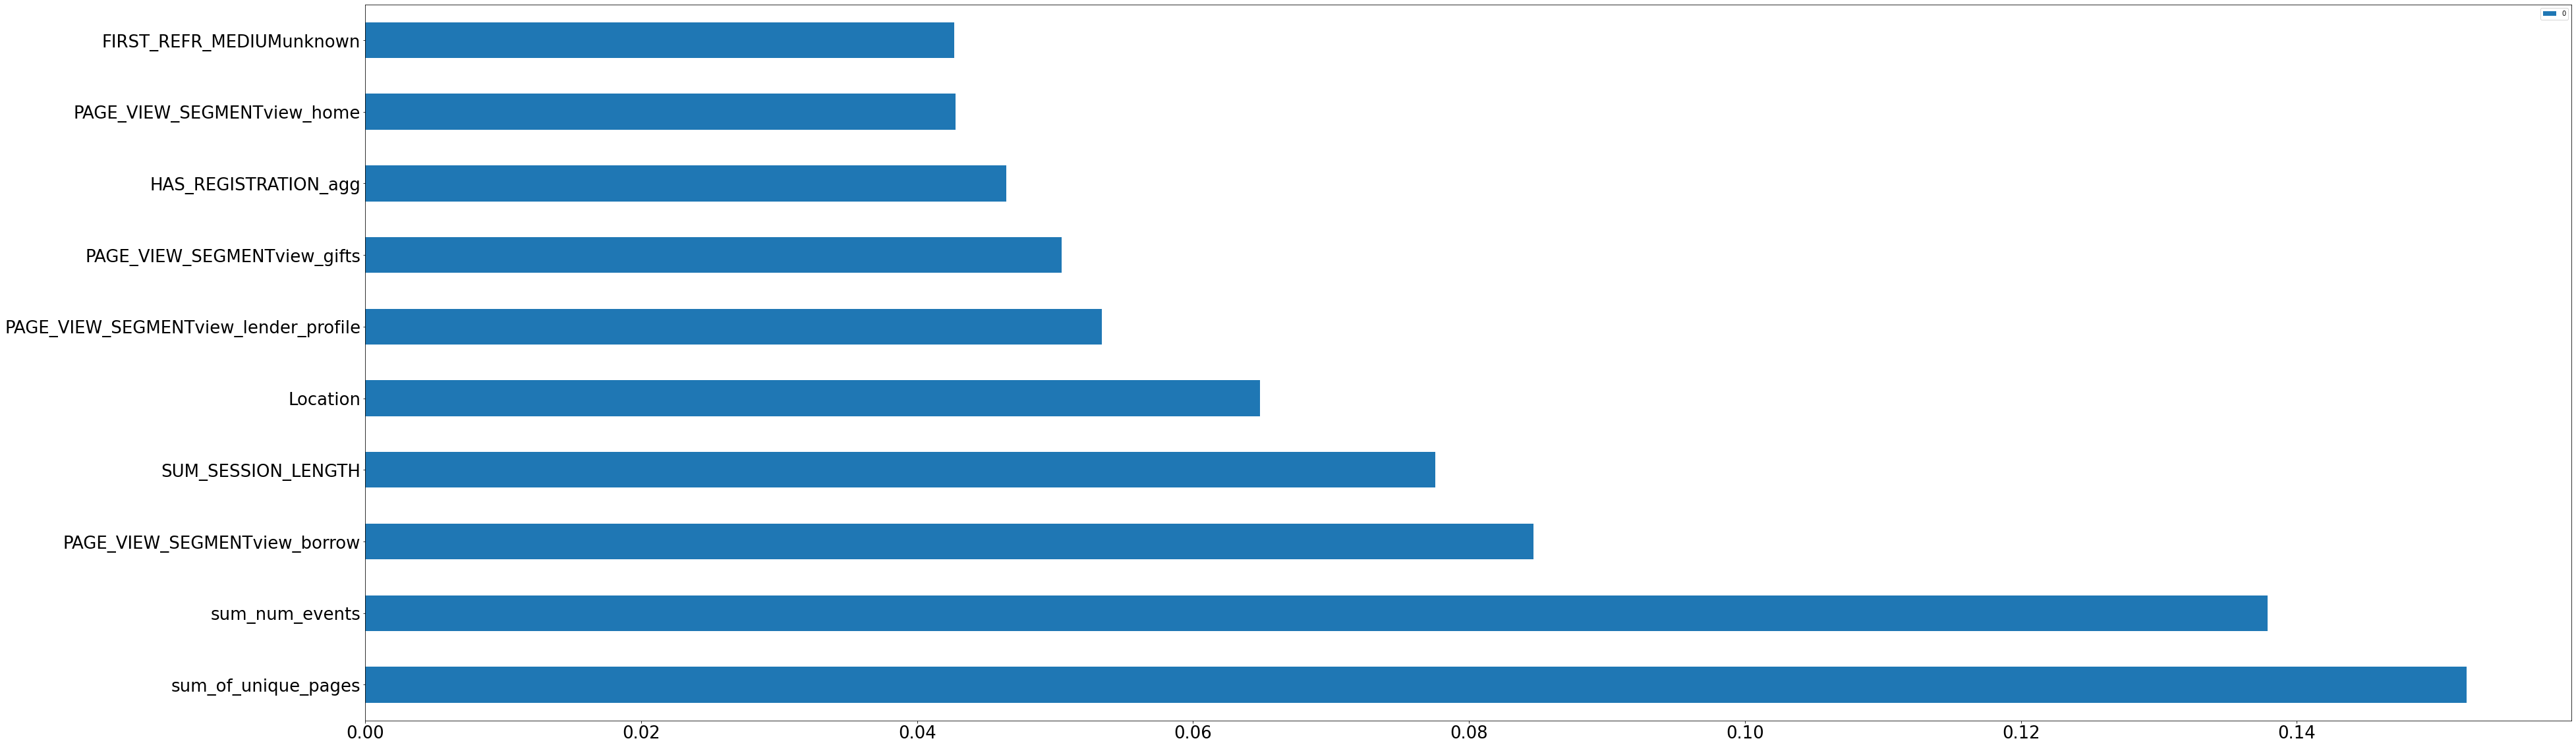

In [ ]:
#Feature Importance
feature_imp = rfc.feature_importances_
np.shape(np.transpose(feature_imp))
fimp_pd = pd.DataFrame(feature_imp.T, index = X_train.columns)
fig = fimp_pd.nlargest(10,0).plot(kind='barh', figsize=(60, 20), fontsize=26).get_figure()
fig.savefig("Feature_importance.png")

In [ ]:
import shap
y_test = y_test.astype(int)
rfc_pred = rfc.predict(X_test)
rfc_pred = pd.DataFrame(rfc_pred, index=y_test.index)
results_df = pd.concat([rfc_pred, y_test.astype('int')], axis=1)
results_df = results_df.rename(columns={0: "rfc_pred", "Transaction_output": "y_test"})
results_df

,rfc_pred,y_test
1981,1,1
2724,0,0
202,0,1
1637,1,1
1705,0,0
...,...,...
5896,1,0
1130,1,1
4971,1,0
1061,1,1


In [ ]:
# Create separate dataframes for TP,FP,TN,FN predictions
results_df_TP = results_df.query('(y_test == 1) & (rfc_pred == 1)')
results_df_FN = results_df.query('(y_test == 1) & (rfc_pred == 0)')
results_df_TN = results_df.query('(y_test == 0) & (rfc_pred == 0)')
results_df_FP = results_df.query('(y_test == 0) & (rfc_pred == 1)')
# True Positive indices from the test set
TP_indices = results_df_TP.index
FP_indices = results_df_FP.index
TN_indices = results_df_TN.index
FN_indices = results_df_FN.index
explainer = shap.TreeExplainer(rfc)

In [ ]:
# SHAP Analysis for a True Positive observation
from matplotlib import pyplot as plt
chosen_instance = X_test.loc[TP_indices[1]]
shap_values = explainer.shap_values((chosen_instance))
shap.initjs()
#plt.figure(figsize=(1800, 1800), dpi=2000)
#plt =  matplotlib=True, show=False
shap.force_plot(explainer.expected_value[1], shap_values[1], (chosen_instance))
#plt.show()

In [ ]:
X_train.shape

(7128, 51)

In [ ]:
import matplotlib.pyplot as plt

rs = np.random.RandomState(0)
X_train.loc[:,"sum_of_unique_pages"] = X_train.loc[:,"sum_of_unique_pages"].astype(int)
corr = X_train.corr()
corr = corr["sum_of_unique_pages"]
corr = corr[abs(corr)>0.5]
corr


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


sum_of_unique_pages                     1.000000
PAGE_VIEW_SEGMENTview_lender_profile    0.746460
PAGE_VIEW_SEGMENTview_login             0.561594
Name: sum_of_unique_pages, dtype: float64

In [ ]:
X_test["sum_of_unique_pages"]

In [ ]:
feature_df = pd.DataFrame(shap_values[1], index = X_test.columns)
feature_df = pd.concat([feature_df, X_test.loc[TP_indices[1]]], axis=1)
feature_df.sort_values(by = 0, ascending = False).head(20)

,0,1637
sum_of_unique_pages,0.313142,1
sum_num_events,0.133948,3
SUM_SESSION_LENGTH,0.074059,0.283333
Location,0.030333,1
PAGE_VIEW_SEGMENTview_lender_profile,0.029387,0.0
PAGE_VIEW_SEGMENTview_borrow,0.027590,0.0
PAGE_VIEW_SEGMENTview_login,0.009943,0.0
FIRST_REFR_MEDIUMinternal,0.008292,0
PAGE_VIEW_SEGMENTview_portfolio,0.002962,0.0
PAGE_VIEW_SEGMENTview_settings,0.002952,0.0


In [ ]:
feature_df = pd.DataFrame(shap_values[1], index = X_test.columns)
feature_df = pd.concat([feature_df, X_test.loc[TP_indices[1]]], axis=1)
feature_df.sort_values(by = 0, ascending = False).tail(8)

,0,1637
PAGE_VIEW_SEGMENTview_about,-0.001396,0.0
PAGE_VIEW_SEGMENTview_teams,-0.001771,0.0
FIRST_REFR_MEDIUMsearch,-0.002555,0
PAGE_VIEW_SEGMENTview_gifts,-0.007575,0.0
PAGE_VIEW_SEGMENTview_borrower_profile,-0.014197,0.0
PAGE_VIEW_SEGMENTview_lend_experience,-0.014809,0.0
HAS_REGISTRATION_agg,-0.041016,1
PAGE_VIEW_SEGMENTview_register,-0.105204,1.0


# Test

In [ ]:
##predicitng for the month of Dec 2021
DEC_2021_success = pd.read_csv("Dec_success_data.csv")
DEC_2021_failure = pd.read_csv("Dec_Failures.csv")
failure = convert_data_to_user_granularity_failure(DEC_2021_failure)
success = convert_data_to_user_granularity(DEC_2021_success)
Dec_full_data = pd.concat([failure,success ])

In [ ]:
Dec_2021_user_level_data = Dec_2021_user_level_data.dropna()
y_test = Dec_2021_user_level_data["Transaction_output"]
Dec_2021_user_level_data_cleaned = Dec_2021_user_level_data.drop(['Transaction_output', 'DOMAIN_USERID', 'sum_num_basket_page', 'sum_num_basket_validate_events', 'sum_basket_payment', 'sum_num_add_to_basket_events',  'sum_num_basket_validate_events', 'sum_num_basket_page'], axis=1)
predictions_Dec_2021 = rfc.predict(Dec_2021_user_level_data_cleaned)
confusion_matrix(y_test.astype('int'), predictions_Dec_2021)

NameError: name 'Dec_2021_user_level_data' is not defined

In [ ]:
print("Number of predicted users to lend from Dec 2021 data:", sum(predictions_Dec_2021))

In [ ]:
precision = precision_score(y_test.astype('int'), predictions_Dec_2021, average='binary')
recall = recall_score(y_test.astype('int'), predictions_Dec_2021, average='binary')
score = f1_score(y_test.astype('int'), predictions_Dec_2021, average='binary')
print("Precision:", round(precision,2))
print("Recall:",round(recall,2) )
print("F1_score:",round(score,2) )

NameError: name 'predictions_Dec_2021' is not defined

In [ ]:
##predicitng for the month of Dec 2020
DEC_2020_success = pd.read_csv("Dec_2020_success.csv")
DEC_2020_failure = pd.read_csv("Dec_2020_failures.csv")
Dec_full_data_2020 = pd.concat([DEC_2020_success,DEC_2020_failure ])
Dec_2020_user_level_data = convert_data_to_user_granularity(Dec_full_data_2020)
Dec_2020_user_level_data = Dec_2020_user_level_data.dropna()
y_test_2020 = Dec_2020_user_level_data["Transaction_output"]
Dec_2020_user_level_data_cleaned = Dec_2020_user_level_data.drop(['Transaction_output', 'NUMBER_OF_SESSIONS', 'sum_num_about_page_views', 'sum_num_direct_page_views', 'sum_num_lend_page_views', 'sum_num_get_started_page_views','sum_num_borrower_profiles', 'sum_num_core_borrower', 'sum_num_donate_page', 'DOMAIN_USERID', 'sum_num_basket_page', 'sum_num_basket_validate_events', 'sum_basket_payment','sum_MG_page','sum_num_mg_setup','sum_num_portfolio_pageviews', 'sum_num_add_to_basket_events','sum_num_click_actions','HAS_LOGIN_agg', 'HAS_REGISTERED_BEFORE_agg','IS_PART_OF_EXP',  'sum_num_add_to_basket_events', 'sum_num_basket_validate_events', 'sum_num_basket_page'], axis=1)
predictions_Dec_2020 = rfc.predict(Dec_2020_user_level_data_cleaned)
confusion_matrix(y_test_2020.astype('int'), predictions_Dec_2020)
precision = precision_score(y_test_2020.astype('int'), predictions_Dec_2020, average='binary')
recall = recall_score(y_test_2020.astype('int'), predictions_Dec_2020, average='binary')
score = f1_score(y_test_2020.astype('int'), predictions_Dec_2020, average='binary')
print("Precision:", round(precision,2))
print("Recall:",round(recall,2) )
print("F1_score:",round(score,2) )

IndexError: list index out of range

## Feature Importance

In [ ]:
#Feature Importance
%matplotlib inline
feature_imp = rfc.feature_importances_
np.shape(np.transpose(feature_imp))
fimp_pd = pd.DataFrame(feature_imp.T, index = X_train.columns)
fig = fimp_pd.nlargest(20,0).plot(kind='barh', figsize=(60, 20), fontsize=26).get_figure()
fig.savefig("Feature_importance.png")

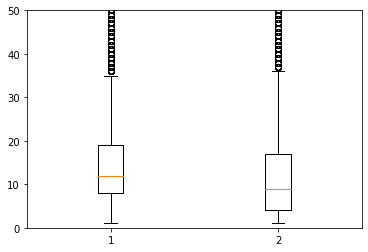

In [ ]:
ax = plt.gca()
ax.set_ylim([0, 50])
ax.boxplot( [X_removed[ y_removed==0]["sum_of_unique_pages"],X_removed[ y_removed==1]["sum_of_unique_pages"]])
plt.show()

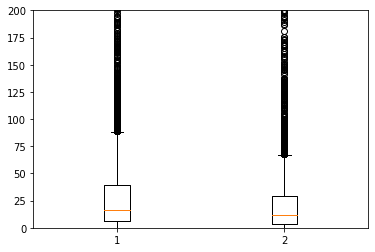

In [ ]:
ax = plt.gca()
ax.set_ylim([0, 200])
ax.boxplot( [X_removed[ y_removed==0]["SUM_SESSION_LENGTH"],X_removed[ y_removed==1]["SUM_SESSION_LENGTH"]])
plt.show()

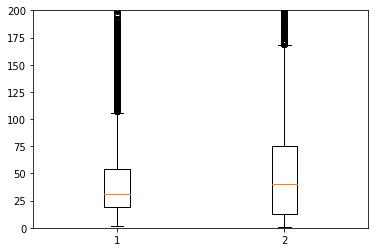

In [ ]:
ax = plt.gca()
ax.set_ylim([0, 200])
ax.boxplot( [X_removed[ y_removed==0]["sum_num_events"],X_removed[ y_removed==1]["sum_num_events"]])
plt.show()

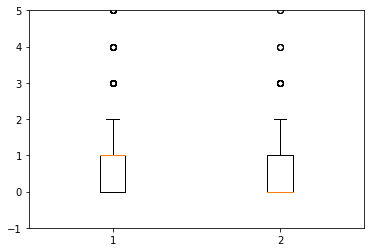

In [ ]:
ax = plt.gca()
ax.set_ylim([-1, 5])
ax.boxplot( [X_removed[ y_removed==0]["HAS_REGISTRATION_agg"],X_removed[ y_removed==1]["HAS_REGISTRATION_agg"]])
plt.show()

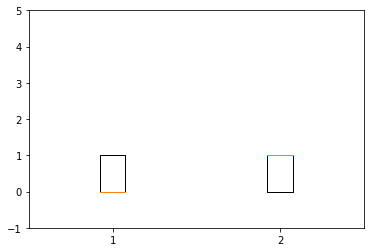

In [ ]:
ax = plt.gca()
ax.set_ylim([-1, 5])
ax.boxplot( [X_removed[ y_removed==0]["Location"],X_removed[ y_removed==1]["Location"]])
plt.show()

# Predict

In [ ]:
##predicitng for the month of January 2022 - data tested 17th of January
Jan_2022_data = pd.read_csv("Jan_2022_predict.csv")
Jan_2022_user_level_data = convert_data_to_user_granularity_failure(Jan_2022_data)

In [ ]:
Jan_2022_user_level_data_1 = Jan_2022_user_level_data[Jan_2022_user_level_data.Transaction_output==0].dropna()
Jan_2022_user_level_data_cleaned = Jan_2022_user_level_data_1.drop(['Transaction_output', 'DOMAIN_USERID', 'sum_num_basket_page', 'sum_num_basket_validate_events', 'sum_basket_payment', 'sum_num_add_to_basket_events',  'sum_num_basket_validate_events', 'sum_num_basket_page'], axis=1)
predict_Jan_2022 = rfc.predict(Jan_2022_user_level_data_cleaned)

In [ ]:
Jan_2022_user_level_data_1 = Jan_2022_user_level_data[Jan_2022_user_level_data.Transaction_output==0].dropna()
Jan_2022_user_level_data_cleaned = Jan_2022_user_level_data_1.drop(['Transaction_output', 'NUMBER_OF_SESSIONS', 'sum_num_about_page_views', 'sum_num_direct_page_views', 'sum_num_lend_page_views', 'sum_num_get_started_page_views','sum_num_borrower_profiles', 'sum_num_core_borrower', 'sum_num_donate_page', 'DOMAIN_USERID', 'sum_num_basket_page', 'sum_num_basket_validate_events', 'sum_basket_payment','sum_MG_page','sum_num_mg_setup','sum_num_portfolio_pageviews', 'sum_num_add_to_basket_events','sum_num_click_actions','HAS_LOGIN_agg', 'HAS_REGISTERED_BEFORE_agg','IS_PART_OF_EXP',  'sum_num_add_to_basket_events', 'sum_num_basket_validate_events', 'sum_num_basket_page'], axis=1)
predict_Jan_2022 = rfc.predict(Jan_2022_user_level_data_cleaned)


In [ ]:
print("Number of predicted users to lend from Jan 2022 data:", sum(predict_Jan_2022))
print()
print(Jan_2022_user_level_data_1.dropna()[predict_Jan_2022==1]["DOMAIN_USERID"])
Jan_2022_user_level_data_1[predict_Jan_2022==1]["DOMAIN_USERID"].to_excel('./Predicted_users_2022.xlsx')

Number of predicted users to lend from Jan 2022 data: 7306

0        0000aaa8-d5a0-4dfd-b501-f94ba4dfb4d4
1        00021360-0140-4ec5-b31b-b441b6627604
2        000e1ab6-04a0-439b-bae2-df08d4a48986
3        0014ba91-7136-4b6c-baca-3cf0317165cd
10       00347ab4-3939-4c1b-a81d-281fd8515106
                         ...                 
11762    ffca5c00-ee64-4cf5-bbbc-a69ee6a5b90d
11763    ffccff86-97cf-4652-be16-31a4a5a00c1e
11764    ffcdf434-72c7-4918-afc5-8dae0c4b019a
11765    ffdc6d22-dddf-49c3-8346-4cd018c26e55
11768    ffed2163-b7c6-4ed6-9960-7cff7aefcc68
Name: DOMAIN_USERID, Length: 7306, dtype: object


In [ ]:
Jan_2022_user_level_data_1[predict_Jan_2022==0]["DOMAIN_USERID"].to_excel('./Predicted_users_2022_fail.xlsx')

In [ ]:
Jan_2022_data[Jan_2022_data["DOMAIN_USERID"]=="7c575b8a-9028-48db-90a6-bd625de25bb2"]

,DOMAIN_USERID,DOMAIN_SESSIONID,SESSION_KEY,HAS_DISABLED_SNOWPLOW_TRACKING,LOGIN_ID,SESSION_LENGTH_MINUTES,FIRST_SESSION_TIMESTAMP,LAST_SESSION_TIMESTAMP,FIRST_SESSION_DAY_ID,LAST_SESSION_DAY_ID,FIRST_SESSION_EVENT_ID,FIRST_SESSION_SEQUENCE_NUMBER,LAST_SESSION_SEQUENCE_NUMBER,SESSION_END_IN_LOGIN_SUCCESS,DOMAIN_USER_SESSION_NUMBER,LOGIN_SESSION_NUMBER,NUM_DISTINCT_LOGGED_IN_LOGIN_IDS,DISTINCT_LOGGED_IN_LOGIN_IDS,NUM_UNIQUE_PAGE_VIEWS,NUM_PAGE_VIEWS,NUM_NON_LOGIN_REGISTER_PAGE_VIEWS,NUM_NON_AUTH_ZERO_HOSTED_PAGE_VIEWS,NUM_ABOUT_PAGE_VIEWS,NUM_DIRECT_BORROW_PAGE_VIEWS,NUM_LEND_EXPERIENCE_VIEWS,NUM_GET_STARTED_PAGEVIEWS,NUM_BORROWER_PROFILES_VIEWED,NUM_CORE_BORROWER_PROFILES_VIEWED,NUM_DIRECT_BORROWER_PROFILES_VIEWED,NUM_DONATE_PAGEVIEWS,NUM_BASKET_PAGEVIEWS,NUM_BASKET_PAYMENT_PAGEVIEWS,NUM_CHECKOUT_THANKS_PAGEVIEWS,NUM_VALIDATE_BASKET_EVENTS,NUM_CHECKOUT_EVENTS,NUM_MONTHLYGOOD_PAGEVIEWS,NUM_MONTHLYGOOD_SETUP_PAGEVIEWS,NUM_MONTHLYGOOD_THANKS_PAGEVIEWS,NUM_PORTFOLIO_PAGEVIEWS,NUM_EVENTS,NUM_ADD_TO_BASKET_EVENTS,NUM_CLICK_ACTIONS,NUM_DIRECT_APPLICATION_COMPLETE_PAGEVIEWS,NUM_TRACKING_DISABLE_EVENTS,NUM_TRACKING_ENABLE_EVENTS,NUM_TRACKING_UPDATE_EVENTS,NUM_CAPTCHA_SHOWN,NUM_CAPTCHA_SOLVED,NUM_CAPTCHA_FAILED,HAS_TRANSACTION_EVENT,HAS_REGISTRATION,HAS_LOGIN,HAS_REGISTERED_BEFORE,IS_NEW_USER,IS_FIRST_DEPOSIT_SESSION,FIRST_TRANSACTION_ID,LOAN_PURCHASE_INDIVIDUAL,LOAN_PURCHASE_MANAGED,DONATION_INDIVIDUAL,DONATION_MANAGED,DEPOSIT_INDIVIDUAL,DEPOSIT_MANAGED,NUM_GUEST_CHECKOUT_DEPOSITS,GIFT_PURCHASE_INDIVIDUAL,EXPERIMENT_NAMES,EXPERIMENT_CATEGORIES,EXPERIMENT_LABELS,EXPERIMENT_PROPERTIES,EXPERIMENT_VALUES,EXPERIMENT_NAMES_LABELS,FIRST_REFR_SOURCE,FIRST_REFR_MEDIUM,REFERRAL_HASH,FIRST_PAGE_REFERRER,FIRST_MKT_SOURCE,FIRST_MKT_MEDIUM,FIRST_MKT_CAMPAIGN,FIRST_MKT_TERM,FIRST_MKT_CONTENT,FIRST_LOAN_PAGE_DISTRIBUTION_MODEL,FIRST_NON_NULL_REFR_SOURCE,FIRST_NON_NULL_REFR_MEDIUM,FIRST_NON_NULL_MKT_SOURCE,FIRST_NON_NULL_MKT_MEDIUM,FIRST_NON_NULL_MKT_CAMPAIGN,FIRST_NON_NULL_MKT_CONTENT,LANDING_PAGE,LANDING_PAGE_QUERY,IP_ADDRESS,USER_FINGERPRINT,BROWSER_FAMILY,BROWSER_TYPE,BROWSER_VERSION,BROWSER_LANGUAGE,DEVICE_TYPE,DEVICE_IS_MOBILE,DEVICE_RESOLUTION,OPERATING_SYSTEM,OPERATING_SYSTEM_FAMILY,OPERATING_SYSTEM_TIMEZONE,GEO_TIMEZONE,GEO_LATITUDE,GEO_LONGITUDE,GEO_ZIPCODE,GEO_CITY,GEO_REGION,GEO_REGION_NAME,GEO_COUNTRY,SUBSCRIPTION_AUTO_DEPOSIT_ID,SUBSCRIPTION_TYPE,SUBSCRIPTION_DEPOSIT_AMOUNT,SUBSCRIPTION_DONATION_AMOUNT,SUBSCRIPTION_CATEGORY,SUBSCRIPTION_PAYMENT_TYPE,HAS_ACTION,RECENT_SESSION,PAGE_URLPATH,PAGE_VIEW_SEGMENT


In [ ]:
print(predict_Jan_2022[Jan_2022_user_level_data_1["DOMAIN_USERID"]=="dce2bd3e-73b0-41dd-beb5-f61e5ed7eabd"])

[]


In [ ]:
len(Jan_2022_user_level_data_1)

10363

In [ ]:
DOMAIN_USERID	FIRST_SESSION_TIMESTAMP
a308690a-f770-4d43-932c-5236a11c8b33	Not tested
794e3c9d-4f63-426f-85a1-38d6216a9b6e	Not tested
5b06bbff-f613-4342-8e67-5e591a1caf6a	 FN
3daa9f38-a6d3-41d9-8f70-867e1bed829c	Not tested
6f313329-1753-4770-9e49-ec44babfb438	Not tested
b4d66e14-d7a4-4148-a884-3f59cec17d77	Not tested
062cb150-3e87-4958-9810-68cafc95c7ca	TP
6a4ca135-e6a5-4043-98c6-86dfc08d5091	TP
ae74f803-e5e4-4aaf-882b-fdbd4667abfd	 FN
0bb6314e-6adc-4bff-8995-cb7c088c778c	TP
af0fd744-5855-4287-be83-9c841aa27f1f	 Not tested
943b8078-35a5-4cce-80f3-80487604562f	Not tested
e305e678-9716-43db-aa5c-47926ba6662f	TP
7c575b8a-9028-48db-90a6-bd625de25bb2	Not tested
ea96fdaa-27fc-413d-95c1-f457cb3ab474	Not tested
5ed4482f-1b19-41d7-b7a3-786476844e67	TP
a944ab3b-1e47-45e3-af84-8dd320d4cf14	Not tested
6a2b594f-fd84-4b6d-9d63-5d8bdcee4a04	Not tested
42c6d6f2-adf2-4120-ad91-7d9e2f2212ed	Not tested
2502e91d-7d7b-495c-acd8-2fa5eab7b212	Not tested
2c8c3657-6ad1-4abf-ae00-03a29b9c32f6	FN
fbbe46c0-80f1-4eb2-aabf-c9e67488e999	TP
d203dd6b-be11-4694-a9d1-e08166d68b14	FN
dd24cf87-d31e-419b-9c02-b577cc197a9e	FN
cf0c3565-c585-4b9a-b8ff-9ef0769bda3c	Not tested
b7c643b6-9d91-4df8-86e5-781f610886c0	TP
409aeb5a-1671-4479-a301-3cb23c440e3a	Not tested
a7f5a976-f17d-4655-8324-77f45f99b338	FN
dce2bd3e-73b0-41dd-beb5-f61e5ed7eabd	Not tested

# PCA

In [ ]:
downsampled_data_pca = downsampled_data_set.dropna()
y_removed = downsampled_data_pca.Transaction_output
X_removed = downsampled_data_pca.drop(['Transaction_output', 'DOMAIN_USERID'], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
x = StandardScaler().fit_transform(X_removed)
value, vector = eig(pd.DataFrame(x).cov())

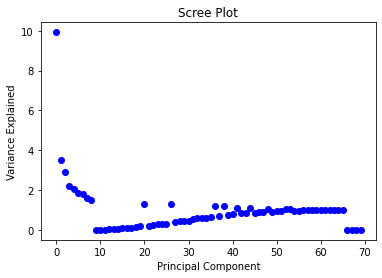

In [ ]:
plt.plot(value,"o", linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(principalComponents,y_removed, test_size=0.25, random_state=27)


In [ ]:
#Grid search
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}


rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42,
                               n_jobs = -1,
                              scoring=scorers, refit='recall_score')
rf_random.fit(X_train, y_train.astype('int'))

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, refit='recall_score',
                   scoring={'accuracy_score': make_scorer(accuracy_score),
                            'precision_score': make_scorer(precision_score),
                            '

In [ ]:
#Random forest
rf_random.best_estimator_
rfc = RandomForestClassifier(max_depth=60, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=90).fit(X_train, y_train.astype('int'))
#rfc = RandomForestClassifier(max_depth=110, max_features='sqrt', min_samples_split=10,
                      # n_estimators=30).fit(X_train, y_train.astype('int'))
rfc_pred = rfc.predict(X_test)
confusion_matrix(y_test.astype('int'), rfc_pred)

array([[1210,  190],
       [ 147,  830]])

In [ ]:
precision = precision_score(y_test.astype('int'), rfc_pred, average='binary')
recall = recall_score(y_test.astype('int'), rfc_pred, average='binary')
score = f1_score(y_test.astype('int'), rfc_pred, average='binary')
print("Precision:", round(precision,2))
print("Recall:",round(recall,2) )
print("F1_score:",round(score,2) )

Precision: 0.81
Recall: 0.85
F1_score: 0.83


In [ ]:
Jan_2022_user_level_data_1 = Jan_2022_user_level_data[Jan_2022_user_level_data.Transaction_output==0].dropna()
Jan_2022_user_level_data_cleaned = Jan_2022_user_level_data_1.drop(['Transaction_output', 'DOMAIN_USERID'], axis=1)


In [ ]:
 temp = np.dot(np.array(Jan_2022_user_level_data_cleaned) , vector[:,0:25])

In [ ]:
predict_Jan_2022 = rfc.predict(temp)
predict_Jan_2022

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Jan_2022_user_level_data_1[predict_Jan_2022==1]["DOMAIN_USERID"].to_excel('./Predicted_users_2022.xlsx')